# Finales de Ajedrez 
## Lenin Torres Valverde
## 116390003


El dataset analizado en este trabajo presenta información de partidas de ajedrez de como un jugador con un rey y una torre se enfrentan contra el rey contrario y ganan, se presentan las posiciones de las piezas y cuantos movimientos se necesitan para hacerle Jaque mate o empate.

A continuación se le aplicara el pre procesamiento a la base de datos con el objetivo de reducir la complejidad.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline 

El archivo contiene la información en formato CVS separado por comas, por lo tanto se utiliza el siguiente comando para cargarlo.

In [2]:
chess_moves = pd.read_csv("krkopt.data")

Revisamos 10 lineas, las 5 iniciales y las filas de la 9995 a la 9999, esto con tal de visualizar mejor los datos

In [3]:
chess_moves.head(10000)

,a,1,b,3,c,2,draw
0,a,1,c,1,c,2,draw
1,a,1,c,1,d,1,draw
2,a,1,c,1,d,2,draw
3,a,1,c,2,c,1,draw
4,a,1,c,2,c,3,draw
...,...,...,...,...,...,...,...
9995,d,3,g,5,b,8,ten
9996,d,3,g,5,f,2,ten
9997,d,3,g,5,g,2,ten
9998,d,3,g,5,g,3,ten


Este dataset cuenta con 7 columnas, las primeras dos representan la posición del rey blanco, la 3 y 4 la posición de la torre blanca, las columnas 5 y 6 la posición del rey negro y finalmente la columna 7 indica cuantas jugadas son necesarias para dar un Jaque mate, o indica si la partida queda en empate. 

Ahora se colocan los nombres correctos de las columnas

In [4]:
column_names = ['WK_file', 'WK_rank', 'WR_file', 'WR_rank', 'BK_file', 'BK_rank', 'depth-of-win']

In [5]:
chess_moves = pd.read_csv("krkopt.data", names = column_names)

Ahora mostramos nuevamente 10 filas pero esta vez con las columnas debidamente etiquetadas

In [6]:
chess_moves.head(10000)

,WK_file,WK_rank,WR_file,WR_rank,BK_file,BK_rank,depth-of-win
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw
...,...,...,...,...,...,...,...
9995,d,3,g,4,b,7,ten
9996,d,3,g,5,b,8,ten
9997,d,3,g,5,f,2,ten
9998,d,3,g,5,g,2,ten


Ahora es momento de reemplazar los valores que pueden ser confusos, en este caso se sustituirán los datos de la columna 'depth-of-win', que tiene los números en texto y ahora serán remplazados por valores numéricos

In [7]:
chess_moves.replace(to_replace='zero', value = 0, inplace = True)
chess_moves.replace(to_replace='one', value = 1, inplace = True)
chess_moves.replace(to_replace='two', value = 2, inplace = True)
chess_moves.replace(to_replace='three', value = 3, inplace = True)
chess_moves.replace(to_replace='four', value = 4, inplace = True)
chess_moves.replace(to_replace='five', value = 5, inplace = True)
chess_moves.replace(to_replace='six', value = 6, inplace = True)
chess_moves.replace(to_replace='seven', value = 7, inplace = True)
chess_moves.replace(to_replace='eight', value = 8, inplace = True)
chess_moves.replace(to_replace='nine', value = 9, inplace = True)
chess_moves.replace(to_replace='ten', value = 10, inplace = True)
chess_moves.replace(to_replace='eleven', value = 11, inplace = True)
chess_moves.replace(to_replace='twelve', value = 12, inplace = True)
chess_moves.replace(to_replace='thirteen', value = 13, inplace = True)
chess_moves.replace(to_replace='fourteen', value = 14, inplace = True)
chess_moves.replace(to_replace='fifteen', value = 15, inplace = True)
chess_moves.replace(to_replace='sixteen', value = 16, inplace = True)
chess_moves.replace(to_replace='draw', value = -1, inplace = True)


En este caso para el valor de empate como no corresponde a ningún valor numérico se le asignó el valor de -1, a continuación se puede observar.

In [8]:
chess_moves.head(5000)

,WK_file,WK_rank,WR_file,WR_rank,BK_file,BK_rank,depth-of-win
0,a,1,b,3,c,2,-1
1,a,1,c,1,c,2,-1
2,a,1,c,1,d,1,-1
3,a,1,c,1,d,2,-1
4,a,1,c,2,c,1,-1
...,...,...,...,...,...,...,...
4995,d,3,g,3,f,1,7
4996,d,3,g,3,g,1,7
4997,d,3,g,3,h,5,7
4998,d,3,g,3,h,6,7


A continuacion se mostrarán 3 gráficas en las que se muestra por cantidad de movimientos que tan probable es que estando en cierta posición se logre un jaque mate.

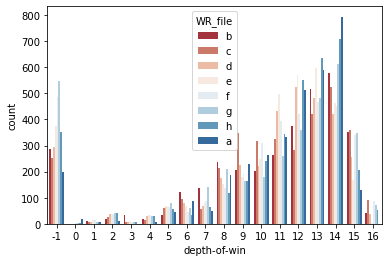

In [9]:
plt.figure()
sns.countplot(x='depth-of-win', hue='WR_file', data=chess_moves, palette='RdBu')
plt.show()

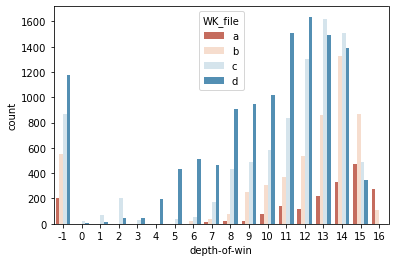

In [10]:
plt.figure()
sns.countplot(x='depth-of-win', hue='WK_file', data=chess_moves, palette='RdBu')
plt.show()

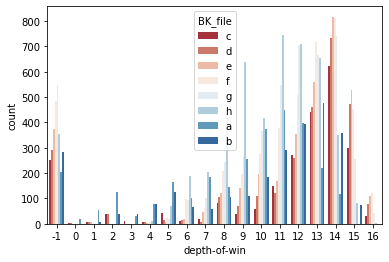

In [11]:
plt.figure()
sns.countplot(x='depth-of-win', hue='BK_file', data=chess_moves, palette='RdBu')
plt.show()

El siguiente paso de preprocesado será combinar todas las filas de manera uniforme para luego proceder finalmente a separar el set de datos en dos set más pequeños, uno para entrenar y el otro para probar

In [12]:
chess_moves = chess_moves.sample(frac=1).reset_index(drop=True)
chess_moves.head()

,WK_file,WK_rank,WR_file,WR_rank,BK_file,BK_rank,depth-of-win
0,c,2,c,6,b,5,-1
1,c,3,b,8,c,1,2
2,b,2,h,7,f,3,14
3,d,3,b,7,c,1,1
4,c,3,e,1,b,1,2


Finalmente se va a partir el set de datos en dos, uno para entrenamiento y otro para validación.

In [13]:
limit = int(chess_moves.size*0.7/7)
print(limit)
training_set = chess_moves[0:limit]

19639


In [14]:
print(training_set.size)
training_set.head(1000)

137473


,WK_file,WK_rank,WR_file,WR_rank,BK_file,BK_rank,depth-of-win
0,c,2,c,6,b,5,-1
1,c,3,b,8,c,1,2
2,b,2,h,7,f,3,14
3,d,3,b,7,c,1,1
4,c,3,e,1,b,1,2
...,...,...,...,...,...,...,...
995,d,4,e,4,a,1,6
996,c,3,d,4,f,1,8
997,b,2,c,5,h,7,13
998,c,2,d,3,h,7,12


In [15]:
limit = int(chess_moves.size*0.7/7)
test_set = chess_moves[limit:chess_moves.size].reset_index(drop=True)

In [16]:
test_set.head(1000)

,WK_file,WK_rank,WR_file,WR_rank,BK_file,BK_rank,depth-of-win
0,b,1,g,4,h,3,-1
1,b,1,a,5,a,4,-1
2,d,4,g,2,f,2,-1
3,c,2,b,4,a,8,6
4,c,1,d,1,c,5,12
...,...,...,...,...,...,...,...
995,d,1,e,1,b,5,14
996,b,2,b,5,f,1,10
997,c,3,h,4,f,2,9
998,d,2,f,8,b,7,13
